## POSTTEST 7
Muhammad Akbar Fahrezi

2109106117



In [4]:
!cp kaggle.json ~/.kaggle/

## API Kaggle

In [5]:
!kaggle datasets download -d imsparsh/deepweeds

100% 469M/470M [00:16<00:00, 34.6MB/s]
100% 470M/470M [00:16<00:00, 30.2MB/s]


## Unzip Datasets

In [6]:
!unzip deepweeds.zip -d deepweeds

Streaming output truncated to the last 5000 lines.
  inflating: deepweeds/images/20180109-072434-2.jpg  
  inflating: deepweeds/images/20180109-072438-1.jpg  
  inflating: deepweeds/images/20180109-072442-2.jpg  
  inflating: deepweeds/images/20180109-072448-1.jpg  
  inflating: deepweeds/images/20180109-072451-2.jpg  
  inflating: deepweeds/images/20180109-072501-2.jpg  
  inflating: deepweeds/images/20180109-072502-1.jpg  
  inflating: deepweeds/images/20180109-072510-2.jpg  
  inflating: deepweeds/images/20180109-072512-1.jpg  
  inflating: deepweeds/images/20180109-072518-2.jpg  
  inflating: deepweeds/images/20180109-072524-1.jpg  
  inflating: deepweeds/images/20180109-072527-2.jpg  
  inflating: deepweeds/images/20180109-072534-1.jpg  
  inflating: deepweeds/images/20180109-072536-2.jpg  
  inflating: deepweeds/images/20180109-072543-1.jpg  
  inflating: deepweeds/images/20180109-072554-2.jpg  
  inflating: deepweeds/images/20180109-072555-1.jpg  
  inflating: deepweeds/images/2

## Load Data

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [8]:
path = '/content/deepweeds/labels/labels.csv'

In [9]:
import pandas as pd

# Membaca file CSV dengan pandas
df = pd.read_csv('/content/deepweeds/labels/labels.csv')

# Menampilkan 5 baris pertama dari data
print(df.head())

                Filename  Label       Species
0  20160928-140314-0.jpg      0  Chinee apple
1  20160928-140337-0.jpg      0  Chinee apple
2  20160928-140731-0.jpg      0  Chinee apple
3  20160928-140747-0.jpg      0  Chinee apple
4  20160928-141107-0.jpg      0  Chinee apple


In [10]:
learning_rate = 0.001
weight_decay = 0.0001
NUM_EPOCHS = 20 # 20
MAX_EPOCH = 40 #40
RAW_IMG_SIZE = (256, 256)
IMG_SIZE = (224, 224)
INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)
BATCH_SIZE = 32
FOLDS = 5
STOPPING_PATIENCE = 32
LR_PATIENCE = 16
INITIAL_LR = 0.0001

In [12]:
CLASSES_STR = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
CLASSES = [0, 1, 2, 3, 4, 5, 6, 7, 8]

CLASS_NAMES = ['Chinee Apple',
               'Lantana',
               'Parkinsonia',
               'Parthenium',
               'Prickly Acacia',
               'Rubber Vine',
               'Siam Weed',
               'Snake Weed',
               'Negatives']
NUM_CLASSES=9

In [13]:
IMG_DIRECTORY = '/kaggle/input/deepweeds/images/'
LABEL_DIRECTORY = '/kaggle/input/deepweeds/labels/'
OUTPUT_DIRECTORY = './'

## Imagedatagenerator

In [14]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

# Definisikan path ke direktori dataset gambar
image_directory = '/content/deepweeds/images'  # Ganti dengan path direktori gambar DeepWeeds Anda

# Baca file CSV dengan pandas
label_csv = '/content/deepweeds/labels/labels.csv'  # Ganti dengan path file CSV label DeepWeeds Anda
label_df = pd.read_csv(label_csv)

# Konversi kolom 'Label' menjadi string
label_df['Label'] = label_df['Label'].astype(str)

# Inisialisasi ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Membuat generator data gambar dan label
image_generator = datagen.flow_from_dataframe(
    label_df,
    directory=image_directory,
    x_col="Filename",  # Kolom yang berisi nama gambar
    y_col="Label",  # Kolom yang berisi label
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Mode kelas kategori
    classes=CLASSES_STR,
    shuffle=True
)

# Menampilkan informasi generator
print(image_generator.class_indices)


Found 17509 validated image filenames belonging to 9 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8}


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')  # Ubah jumlah kelas menjadi 9
])



In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

In [20]:
model.fit(image_generator, epochs=25, verbose=1)


Epoch 1/25
548/548 [==============================] - 237s 432ms/step - loss: 1.4823 - accuracy: 0.5256
Epoch 2/25
548/548 [==============================] - 236s 431ms/step - loss: 1.2385 - accuracy: 0.5587
Epoch 3/25
548/548 [==============================] - 240s 439ms/step - loss: 1.1576 - accuracy: 0.5790
Epoch 4/25
548/548 [==============================] - 244s 445ms/step - loss: 1.1143 - accuracy: 0.5945
Epoch 5/25
548/548 [==============================] - 255s 465ms/step - loss: 1.0631 - accuracy: 0.6179
Epoch 6/25
548/548 [==============================] - 248s 453ms/step - loss: 1.0201 - accuracy: 0.6346
Epoch 7/25
548/548 [==============================] - 243s 444ms/step - loss: 0.9625 - accuracy: 0.6498
Epoch 8/25
548/548 [==============================] - 232s 423ms/step - loss: 0.9248 - accuracy: 0.6680
Epoch 9/25
548/548 [==============================] - 234s 426ms/step - loss: 0.8800 - accuracy: 0.6793
Epoch 10/25
548/548 [==============================] - 244s 445m

In [27]:
import pandas as pd

# Definisi path ke file CSV data validasi
validation_csv = '/content/deepweeds/labels/val_subset0.csv'  # Ganti dengan path file CSV data validasi Anda

# Baca file CSV validasi dengan pandas
validation_label_df = pd.read_csv(validation_csv)


In [28]:

val_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

In [31]:
validation_label_df['Label'] = validation_label_df['Label'].astype(str)


In [32]:
validation_generator = val_datagen.flow_from_dataframe(
    validation_label_df,  # DataFrame yang berisi data validasi
    directory=image_directory,  # Direktori gambar
    x_col="Filename",  # Kolom yang berisi nama gambar
    y_col="Label",  # Kolom yang berisi label
    target_size=(150, 150),  # Ukuran gambar yang diinginkan
    batch_size=32,
    class_mode='categorical',  # Mode kelas kategori
    shuffle=True
)


Found 3501 validated image filenames belonging to 9 classes.


## visualisasi hasil training

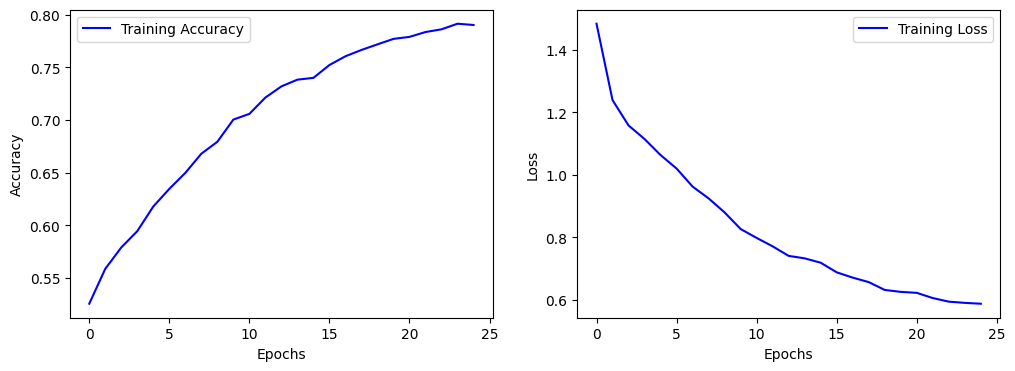

In [37]:
import matplotlib.pyplot as plt

# Dapatkan metrik pelatihan dari riwayat pelatihan
train_accuracy = [0.5256, 0.5587, 0.5790, 0.5945, 0.6179, 0.6346, 0.6498, 0.6680, 0.6793, 0.7004, 0.7058, 0.7213, 0.7319, 0.7383, 0.7400, 0.7522, 0.7605, 0.7665, 0.7718, 0.7770, 0.7789, 0.7835, 0.7861, 0.7914, 0.7902]
train_loss = [1.4823, 1.2385, 1.1576, 1.1143, 1.0631, 1.0201, 0.9625, 0.9248, 0.8800, 0.8270, 0.7986, 0.7717, 0.7413, 0.7334, 0.7195, 0.6888, 0.6719, 0.6576, 0.6326, 0.6264, 0.6233, 0.6067, 0.5952, 0.5913, 0.5886]

# Buat grafik metrik pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
